# Problem Statements
The prediction task is to determine whether a person makes over 50K a year. Explain the performance of the model using accuracy, AUROC curve and confusion matrix.

# Import essential library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Load Dataset

In [2]:
train_df = pd.read_csv('E:\\MMF Assignment\\au_train.csv')
test_df = pd.read_csv('E:\\MMF Assignment\\au_test.csv')

In [3]:
# check first five row of train and test data
train_df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
test_df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [5]:
# check the dataset shape
print("training data shape",train_df.shape)
print("test data shape",test_df.shape)

training data shape (32561, 15)
test data shape (16281, 15)


In [6]:
print('Training data information', train_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  class           32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
Training data information None


In [7]:
print('Test data information', test_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16281 entries, 0 to 16280
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             16281 non-null  int64 
 1   workclass       16281 non-null  object
 2   fnlwgt          16281 non-null  int64 
 3   education       16281 non-null  object
 4   education-num   16281 non-null  int64 
 5   marital-status  16281 non-null  object
 6   occupation      16281 non-null  object
 7   relationship    16281 non-null  object
 8   race            16281 non-null  object
 9   sex             16281 non-null  object
 10  capital-gain    16281 non-null  int64 
 11  capital-loss    16281 non-null  int64 
 12  hours-per-week  16281 non-null  int64 
 13  native-country  16281 non-null  object
 14  class           16281 non-null  object
dtypes: int64(6), object(9)
memory usage: 1.9+ MB
Test data information None


# Merge both dataset into single dataframe 

In [8]:
concat_df = pd.concat((train_df,test_df),axis = 0)
concat_df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
16277,64,?,321403,HS-grad,9,Widowed,?,Other-relative,Black,Male,0,0,40,United-States,<=50K.
16278,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
16279,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


## Data cleaning

In [ ]:
concat_df.isnull().sum()

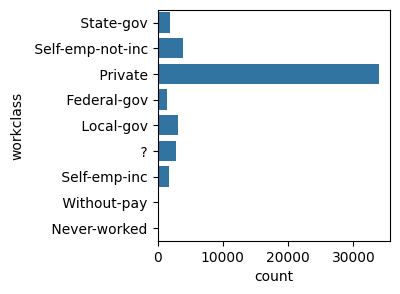

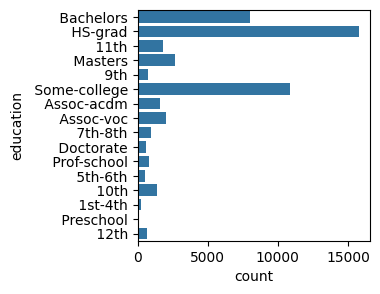

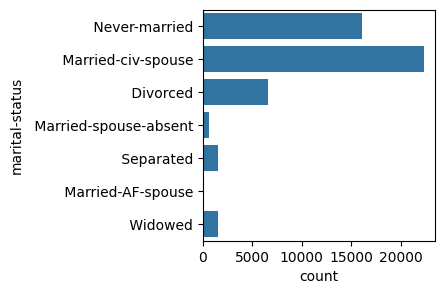

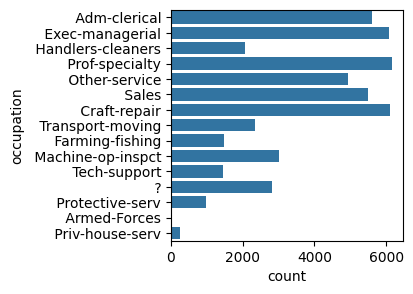

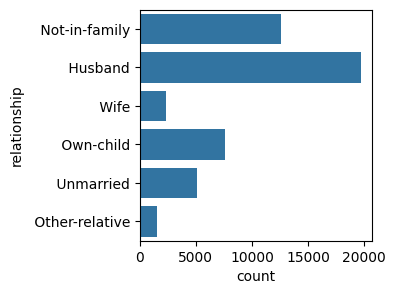

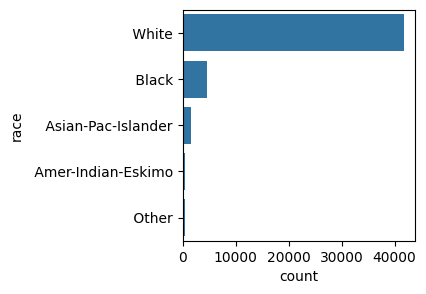

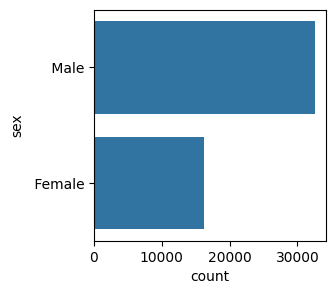

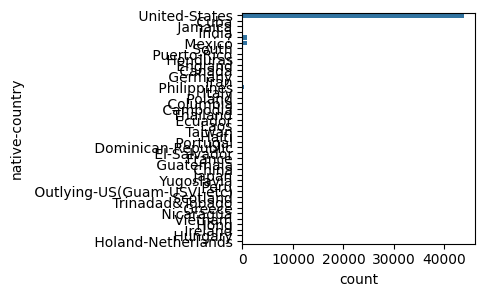

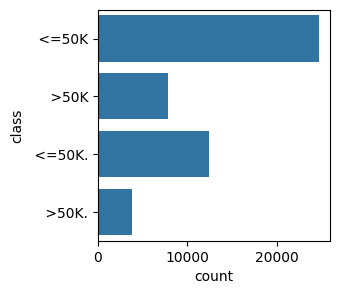

In [9]:
# check the unique value in all categorical column
cat_col = concat_df.select_dtypes(include='object').columns
cat_col
for i in cat_col:
    plt.figure(figsize = (3,3))
    sns.countplot(concat_df[i],)
    plt.show()

In [10]:
concat_df['workclass'].value_counts()

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64

In [11]:
concat_df['native-country'].value_counts()

native-country
United-States                 43832
Mexico                          951
?                               857
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru         

In [12]:
concat_df['occupation'].value_counts()

occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
?                    2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64

In [13]:
# remove ? tag with none value and remove it from dataset
concat_df['occupation'] = concat_df['occupation'].replace(" ?",np.nan)
concat_df['native-country'] = concat_df['native-country'].replace(" ?",np.nan)
concat_df['workclass'] = concat_df['workclass'].replace(" ?",np.nan)

concat_df.dropna(how = 'any',inplace=True)


In [14]:
concat_df['marital-status'].value_counts()

marital-status
Married-civ-spouse       21055
Never-married            14598
Divorced                  6297
Separated                 1411
Widowed                   1277
Married-spouse-absent      552
Married-AF-spouse           32
Name: count, dtype: int64

In [15]:
concat_df['workclass'].value_counts()

workclass
Private             33307
Self-emp-not-inc     3796
Local-gov            3100
State-gov            1946
Self-emp-inc         1646
Federal-gov          1406
Without-pay            21
Name: count, dtype: int64

In [16]:
concat_df['workclass'].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' Self-emp-inc', ' Without-pay'], dtype=object)

reduce workclass category into Private, Govt, SelfEmployee and WithoutPay
1) Private == "Private"
2) Local-gov, State-gov, Federal-gov == "Govt"
3) Self_emp_not_inc, self_emp_inc == "SelfEmployee"
4) else "Without Pay"

In [17]:

def Workclass(x):
    
    if x['workclass'] == " Private":
        return "Private"
    elif x['workclass'] == " Local-gov" or x['workclass'] == ' State-gov' or x['workclass'] == " Federal-gov":
        return "Govt"
    elif x['workclass'] == " Self-emp-not-inc" or x['workclass'] == ' Self-emp-inc':
        return "SelfEmployee"
    else:
        return "WithoutPay"
    

concat_df['workclass'] = concat_df.apply(Workclass,axis = 1)
concat_df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,39,Govt,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,SelfEmployee,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


reduce marital_status column category into single and couple
1) Never-married, Separated, Widowed, Married-spouse-absent == "Single"
2) Married-civ-spouse, Married-AF-spouse == "Couple"

In [18]:

concat_df['marital-status'].unique()
    

array([' Never-married', ' Married-civ-spouse', ' Divorced',
       ' Married-spouse-absent', ' Separated', ' Married-AF-spouse',
       ' Widowed'], dtype=object)

In [19]:
concat_df['MaritalStatus'] = concat_df['marital-status'].replace({" Never-married":"Single",
                                                                   " Divorced":"Single",
                                                                   " Separated":"Single",
                                                                   ' Widowed':"Single",
                                                                   ' Married-spouse-absent':"Single",
                                                                   " Married-civ-spouse":"Couple",
                                                                   " Married-AF-spouse":"Couple"})

concat_df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class,MaritalStatus
0,39,Govt,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,Single
1,50,SelfEmployee,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,Couple
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,Single
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,Couple
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,Couple


In [20]:
concat_df.drop('marital-status',axis = 1,inplace=True)


In [21]:
concat_df.head()

,age,workclass,fnlwgt,education,education-num,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class,MaritalStatus
0,39,Govt,77516,Bachelors,13,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,Single
1,50,SelfEmployee,83311,Bachelors,13,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,Couple
2,38,Private,215646,HS-grad,9,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,Single
3,53,Private,234721,11th,7,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,Couple
4,28,Private,338409,Bachelors,13,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,Couple


# Reduce the country category also in US and Non-US
1) United_states == US
2) Not United_states == Non-US

In [22]:
concat_df['native-country'].value_counts()

native-country
United-States                 41292
Mexico                          903
Philippines                     283
Germany                         193
Puerto-Rico                     175
Canada                          163
El-Salvador                     147
India                           147
Cuba                            133
England                         119
China                           113
Jamaica                         103
South                           101
Italy                           100
Dominican-Republic               97
Japan                            89
Guatemala                        86
Vietnam                          83
Columbia                         82
Poland                           81
Haiti                            69
Portugal                         62
Iran                             56
Taiwan                           55
Greece                           49
Nicaragua                        48
Peru                             45
Ecuador      

In [23]:
print(concat_df['native-country'].unique())

[' United-States' ' Cuba' ' Jamaica' ' India' ' Mexico' ' Puerto-Rico'
 ' Honduras' ' England' ' Canada' ' Germany' ' Iran' ' Philippines'
 ' Poland' ' Columbia' ' Cambodia' ' Thailand' ' Ecuador' ' Laos'
 ' Taiwan' ' Haiti' ' Portugal' ' Dominican-Republic' ' El-Salvador'
 ' France' ' Guatemala' ' Italy' ' China' ' South' ' Japan' ' Yugoslavia'
 ' Peru' ' Outlying-US(Guam-USVI-etc)' ' Scotland' ' Trinadad&Tobago'
 ' Greece' ' Nicaragua' ' Vietnam' ' Hong' ' Ireland' ' Hungary'
 ' Holand-Netherlands']


In [24]:
def NativeCountry(x):
    if x['native-country'] == ' United-States':
        return "US"
    else:
        return "Not-US"
    
concat_df['NativeCountry'] = concat_df.apply(NativeCountry,axis = 1)

concat_df.head()

,age,workclass,fnlwgt,education,education-num,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class,MaritalStatus,NativeCountry
0,39,Govt,77516,Bachelors,13,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,Single,US
1,50,SelfEmployee,83311,Bachelors,13,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,Couple,US
2,38,Private,215646,HS-grad,9,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,Single,US
3,53,Private,234721,11th,7,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,Couple,US
4,28,Private,338409,Bachelors,13,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,Couple,Not-US


In [25]:
# drop native-country column
concat_df.drop('native-country',axis = 1,inplace=True)

Decode Class category 
1) <=50K == 0
2) >=50k == 1

In [26]:
concat_df['class'].value_counts()

class
<=50K     22654
<=50K.    11360
>50K       7508
>50K.      3700
Name: count, dtype: int64

In [27]:
concat_df['class'].unique()

array([' <=50K', ' >50K', ' <=50K.', ' >50K.'], dtype=object)

In [28]:
def Class(x):
    if x['class'] == ' <=50K' or x['class'] ==  ' <=50K.':
        return 0
    else:
        return 1
    
concat_df['class'] = concat_df.apply(Class,axis = 1)
concat_df.head()

,age,workclass,fnlwgt,education,education-num,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,class,MaritalStatus,NativeCountry
0,39,Govt,77516,Bachelors,13,Adm-clerical,Not-in-family,White,Male,2174,0,40,0,Single,US
1,50,SelfEmployee,83311,Bachelors,13,Exec-managerial,Husband,White,Male,0,0,13,0,Couple,US
2,38,Private,215646,HS-grad,9,Handlers-cleaners,Not-in-family,White,Male,0,0,40,0,Single,US
3,53,Private,234721,11th,7,Handlers-cleaners,Husband,Black,Male,0,0,40,0,Couple,US
4,28,Private,338409,Bachelors,13,Prof-specialty,Wife,Black,Female,0,0,40,0,Couple,Not-US


In [29]:
concat_df['class'].value_counts()

class
0    34014
1    11208
Name: count, dtype: int64

In [30]:
concat_df['education'].value_counts()

education
HS-grad         14783
Some-college     9899
Bachelors        7570
Masters          2514
Assoc-voc        1959
11th             1619
Assoc-acdm       1507
10th             1223
7th-8th           823
Prof-school       785
9th               676
12th              577
Doctorate         544
5th-6th           449
1st-4th           222
Preschool          72
Name: count, dtype: int64

In [31]:
concat_df['occupation'].value_counts()

occupation
Craft-repair         6020
Prof-specialty       6008
Exec-managerial      5984
Adm-clerical         5540
Sales                5408
Other-service        4808
Machine-op-inspct    2970
Transport-moving     2316
Handlers-cleaners    2046
Farming-fishing      1480
Tech-support         1420
Protective-serv       976
Priv-house-serv       232
Armed-Forces           14
Name: count, dtype: int64

In [32]:
concat_df['relationship'].value_counts()

relationship
Husband           18666
Not-in-family     11702
Own-child          6626
Unmarried          4788
Wife               2091
Other-relative     1349
Name: count, dtype: int64

In [33]:
concat_df['race'].value_counts()

race
White                 38903
Black                  4228
Asian-Pac-Islander     1303
Amer-Indian-Eskimo      435
Other                   353
Name: count, dtype: int64

In [34]:
concat_df['sex'].value_counts()

sex
Male      30527
Female    14695
Name: count, dtype: int64

In [35]:
concat_df.to_csv('E:\MMF Assignment\Final_AU_data.csv')

# Feature encoding

In [36]:
cat_clmn = concat_df.select_dtypes(include='object').columns
cat_clmn

Index(['workclass', 'education', 'occupation', 'relationship', 'race', 'sex',
       'MaritalStatus', 'NativeCountry'],
      dtype='object')

In [37]:
categorical_col = ['workclass', 'education', 'occupation', 'relationship', 'race', 'sex', 'MaritalStatus', 'NativeCountry']
from sklearn.preprocessing import LabelEncoder
lab_enc = LabelEncoder()
for i in cat_clmn:
    concat_df[i] = lab_enc.fit_transform(concat_df[i])

In [38]:
concat_df.head()

,age,workclass,fnlwgt,education,education-num,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,class,MaritalStatus,NativeCountry
0,39,0,77516,9,13,0,1,4,1,2174,0,40,0,1,1
1,50,2,83311,9,13,3,0,4,1,0,0,13,0,0,1
2,38,1,215646,11,9,5,1,4,1,0,0,40,0,1,1
3,53,1,234721,1,7,5,0,2,1,0,0,40,0,0,1
4,28,1,338409,9,13,9,5,2,0,0,0,40,0,0,0


# Split the dataset into dependent and independent variable

In [39]:
concat_df['class'].value_counts()

class
0    34014
1    11208
Name: count, dtype: int64

In [40]:
X = concat_df.drop('class',axis = 1)
y = concat_df['class']

In [41]:
X

,age,workclass,fnlwgt,education,education-num,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,MaritalStatus,NativeCountry
0,39,0,77516,9,13,0,1,4,1,2174,0,40,1,1
1,50,2,83311,9,13,3,0,4,1,0,0,13,0,1
2,38,1,215646,11,9,5,1,4,1,0,0,40,1,1
3,53,1,234721,1,7,5,0,2,1,0,0,40,0,1
4,28,1,338409,9,13,9,5,2,0,0,0,40,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16275,33,1,245211,9,13,9,3,4,1,0,0,40,1,1
16276,39,1,215419,9,13,9,1,4,0,0,0,36,1,1
16278,38,1,374983,9,13,9,0,4,1,0,0,50,0,1
16279,44,1,83891,9,13,0,3,1,1,5455,0,40,1,1


In [42]:
y

0        0
1        0
2        0
3        0
4        0
        ..
16275    0
16276    0
16278    0
16279    0
16280    1
Name: class, Length: 45222, dtype: int64

# spliting into training and testing dataset

In [43]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3)

In [44]:
# training dataset shape
print(X_train.shape,y_train.shape)

(31655, 14) (31655,)


In [45]:
# testing dataset shape
print(X_test.shape,y_test.shape)

(13567, 14) (13567,)


# Data Normalization

In [46]:
from sklearn.preprocessing import StandardScaler
s_scale = StandardScaler()
X_train_scaled = s_scale.fit_transform(X_train)
X_test_scaled = s_scale.transform(X_test)

In [47]:
X_train_scaled

array([[ 2.08092737,  1.98437206, -0.22304283, ...,  0.7589731 ,
        -1.06541095,  0.30942816],
       [ 0.71644333, -1.89359421,  0.79552204, ..., -0.07847779,
        -1.06541095,  0.30942816],
       [-0.42062671,  0.04538893, -0.72186021, ..., -0.07847779,
        -1.06541095,  0.30942816],
       ...,
       [ 0.86805266,  0.04538893, -0.11080444, ..., -0.07847779,
        -1.06541095,  0.30942816],
       [-0.87545472,  0.04538893, -0.31132734, ..., -0.07847779,
        -1.06541095,  0.30942816],
       [-1.1786734 ,  0.04538893,  0.44969775, ..., -0.07847779,
        -1.06541095,  0.30942816]])

In [48]:
X_test_scaled

array([[ 0.0342013 ,  0.04538893,  0.01431331, ..., -0.07847779,
         0.93860496,  0.30942816],
       [ 0.0342013 ,  0.04538893, -0.15863663, ..., -1.75337956,
        -1.06541095,  0.30942816],
       [ 0.56483399,  0.04538893,  1.34711357, ..., -0.07847779,
        -1.06541095,  0.30942816],
       ...,
       [-0.42062671,  0.04538893, -1.56236309, ..., -0.91592867,
         0.93860496,  0.30942816],
       [-1.48189208,  0.04538893, -1.23541844, ..., -0.07847779,
         0.93860496,  0.30942816],
       [ 0.0342013 ,  0.04538893,  0.95539419, ..., -0.07847779,
        -1.06541095,  0.30942816]])

# Model Building (Logistic Regression)

In [49]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
log_model.fit(X_train_scaled,y_train)

LogisticRegression()

In [50]:
log_pred = log_model.predict(X_test_scaled)
log_pred[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [51]:
y_test[:10]

8965     0
2560     1
10806    0
10915    0
2962     0
4013     0
29564    0
9996     0
10242    0
28165    0
Name: class, dtype: int64

In [52]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report

acc_score = accuracy_score(y_test,log_pred)*100
print(acc_score)

83.48197832977077


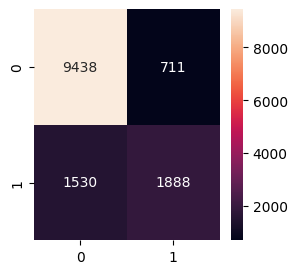

In [53]:

cm = confusion_matrix(y_test,log_pred)
plt.figure(figsize=(3,3))
sns.heatmap(cm,annot=True,fmt = 'd')
plt.show()


In [54]:
print(classification_report(y_test,log_pred))

              precision    recall  f1-score   support

           0       0.86      0.93      0.89     10149
           1       0.73      0.55      0.63      3418

    accuracy                           0.83     13567
   macro avg       0.79      0.74      0.76     13567
weighted avg       0.83      0.83      0.83     13567



# Method2 (Decision Tree)

In [55]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion="entropy")
dtc.fit(X_train_scaled,y_train)

DecisionTreeClassifier(criterion='entropy')

In [56]:
dtc_pred = dtc.predict(X_test_scaled)
dtc_pred[:10]

array([1, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

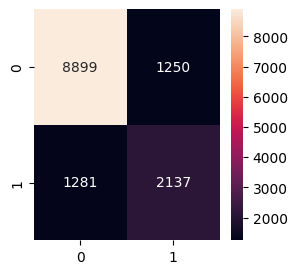

In [57]:
dtc_cm = confusion_matrix(y_test,dtc_pred)
plt.figure(figsize = (3,3))
sns.heatmap(dtc_cm,annot = True,fmt = 'd')
plt.show()

In [58]:
print(accuracy_score(y_test,dtc_pred)*100)

81.34443871157957


# Method_3 (Random Forest Regression)

In [59]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(n_estimators=100)
forest_clf.fit(X_train_scaled,y_train)

RandomForestClassifier()

In [60]:
forest_pred = forest_clf.predict(X_test_scaled)
forest_pred[:10]

array([0, 1, 0, 0, 0, 0, 0, 0, 1, 0], dtype=int64)

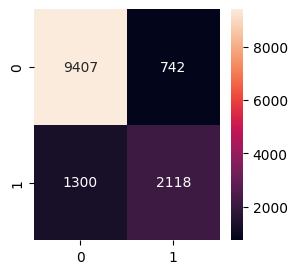

In [61]:
forest_cm = confusion_matrix(y_test,forest_pred)
plt.figure(figsize = (3,3))
sns.heatmap(forest_cm,annot = True,fmt = 'd')
plt.show()

In [62]:
print(accuracy_score(y_test,forest_pred)*100)

84.9487727574261
